# Codetech IT Solutions (Tasks)

Task - 2
    ---   CUSTOMER SEGMENTATION AND ANALYSIS

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
# Load the dataset
data = pd.read_csv('retail_dataset.csv')

In [3]:
# Remove rows with missing CustomerID
data.dropna(subset=['CustomerID'], inplace=True)

In [4]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [5]:
# Calculate TotalPurchaseAmount
data['TotalPurchaseAmount'] = data['Quantity'] * data['UnitPrice']

In [6]:
# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [7]:
# Calculate the Recency, Frequency, and Monetary value
snapshot_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)

In [8]:
# Aggregate data to get RFM values for each customer
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',                                    # Frequency
    'TotalPurchaseAmount': 'sum'                             # Monetary value
}).reset_index()

In [9]:
# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'TotalPurchaseAmount']

In [10]:
# Select relevant features for segmentation
X = rfm[['TotalPurchaseAmount', 'Frequency', 'Recency']]

In [11]:
# Select relevant features for segmentation
X = rfm[['TotalPurchaseAmount', 'Frequency', 'Recency']]

In [12]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\bdeva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bdeva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bdeva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bdeva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

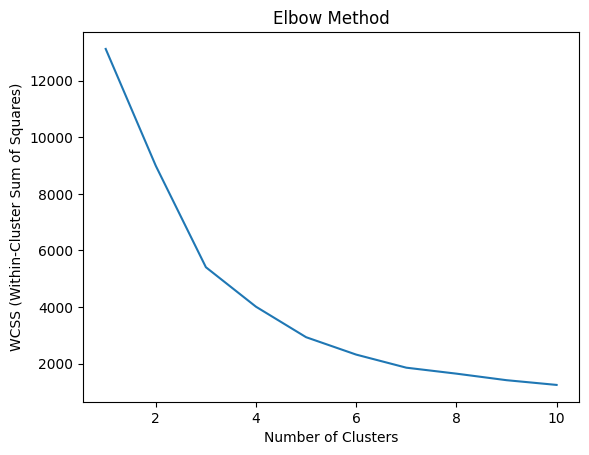

In [14]:
# Plot the elbow method to visualize the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [15]:
# Based on the elbow method, choose the number of clusters
n_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Add cluster labels to the RFM dataset
rfm['Cluster'] = labels

C:\Users\bdeva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
# Analyze segment characteristics
# Aggregate statistics for each cluster
segment_characteristics = rfm.groupby('Cluster').agg({
    'TotalPurchaseAmount': ['mean', 'median', 'min', 'max'],  # Purchase amount statistics
    'Frequency': ['mean', 'median', 'min', 'max'],             # Purchase frequency statistics
    'Recency': ['mean', 'median', 'min', 'max'],               # Recency statistics
    'CustomerID': 'count'                                     # Number of customers in each cluster
}).reset_index()

In [17]:
# Print segment characteristics
print("Segment Characteristics:")
print(segment_characteristics)

Segment Characteristics:
  Cluster TotalPurchaseAmount                                     Frequency  \
                         mean      median       min        max         mean   
0       0         1950.597005     901.715  -1165.30   65892.08   104.874694   
1       1          464.197911     297.330  -4287.63   21535.90    27.710766   
2       2       118713.023333  100754.760  29072.10  279489.02  2845.583333   

                         Recency                  CustomerID  
   median  min   max        mean median  min  max      count  
0    57.0    1  2782   40.254289   29.0    1  156       3264  
1    18.0    1   312  247.244526  241.5  140  374       1096  
2  1971.0  351  7983    5.000000    2.5    1   24         12  


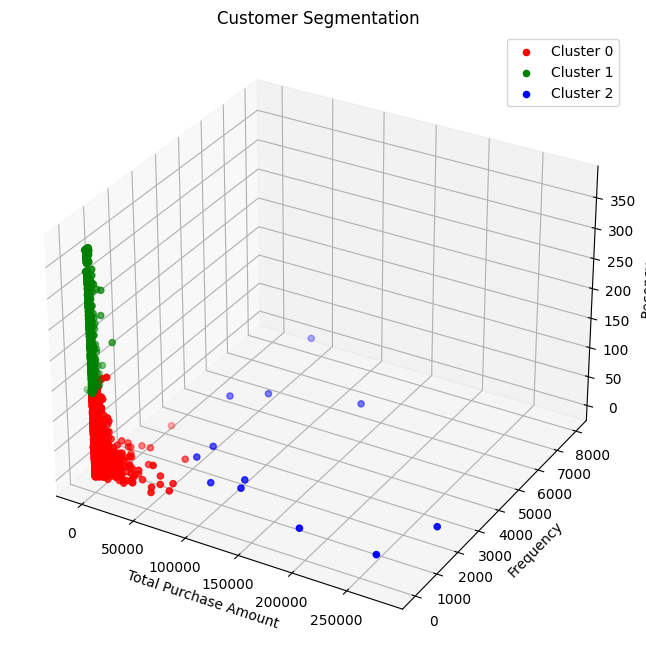

In [18]:
# Visualize the clusters in 3D (for demonstration purposes)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']
for i in range(n_clusters):
    cluster_data = rfm[rfm['Cluster'] == i]
    ax.scatter(cluster_data['TotalPurchaseAmount'], cluster_data['Frequency'], cluster_data['Recency'], c=colors[i], label=f'Cluster {i}')

ax.set_xlabel('Total Purchase Amount')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('Customer Segmentation')
ax.legend()
plt.show()

So, the 3D scatter plot shows the segmentation of customers into three clusters based on their purchasing behavior: Total Purchase Amount, Frequency, and Recency. Cluster 0 (red) includes customers with low purchase amounts and high frequency. Cluster 1 (green) represents customers with low purchase amounts and moderate frequency. Cluster 2 (blue) consists of high-value customers with significantly higher purchase amounts and frequency, indicating potentially more loyal and valuable customers.